In [7]:
#Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
#Import Data
data = pd.read_csv('iris.csv')
data.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [55]:
#Check Balance Dataset
print('Ukuran data : ', data.shape)
print(pd.value_counts(data.variety))

Ukuran data :  (150, 5)
Setosa        50
Virginica     50
Versicolor    50
Name: variety, dtype: int64


In [3]:
#Check Amount of Missing Values
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [4]:
#Summary of Data
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


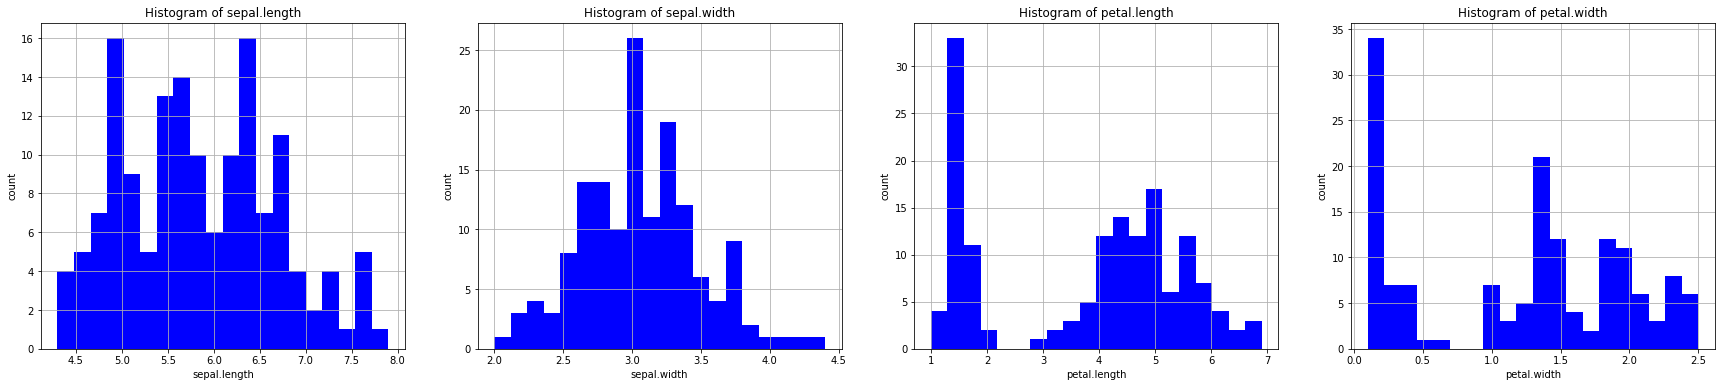

In [9]:
#Make a histogram
plt.rcParams["figure.figsize"] = (30,6) 

plt.subplot(1,4,1)
plt.hist(data['sepal.length'], bins = 20, color = "blue")
plt.xlabel('sepal.length')
plt.ylabel('count')
plt.title("Histogram of sepal.length")
plt.grid(True)

plt.subplot(1,4,2)
plt.hist(data['sepal.width'], bins = 20, color = "blue")
plt.xlabel('sepal.width')
plt.ylabel('count')
plt.title("Histogram of sepal.width")
plt.grid(True)

plt.subplot(1,4,3)
plt.hist(data['petal.length'], bins = 20, color = "blue")
plt.xlabel('petal.length')
plt.ylabel('count')
plt.title("Histogram of petal.length")
plt.grid(True)

plt.subplot(1,4,4)
plt.hist(data['petal.width'], bins = 20, color = "blue")
plt.xlabel('petal.width')
plt.ylabel('count')
plt.title("Histogram of petal.width")
plt.grid(True)

In [15]:
#Split Between Predictor and Class Target
x = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].copy(deep=True)
y = data[['variety']].copy(deep=True)

In [45]:
#See the unique value of class target
print(data["variety"].unique())

['Setosa' 'Versicolor' 'Virginica']


In [33]:
#Split into Test and Train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = None)

In [34]:
#Call Gaussian Naive Bayes 
iris_model = GaussianNB()

In [35]:
#Insert the training dataset to  Naive Bayes function
NB_train = iris_model.fit(x_train, y_train.values.ravel())

In [36]:
#See the impact from ravel
y_train.values.ravel()

array(['Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Virginica',
       'Setosa', 'Virginica', 'Setosa', 'Virginica', 'Setosa',
       'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Setosa',
       'Setosa', 'Virginica', 'Virginica', 'Versicolor', 'Virginica',
       'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica',
       'Setosa', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor',
       'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Virginica',
       'Versicolor', 'Setos

In [37]:
# Next step: Prediction the x_test to the model built and save to the y_pred variable 
# show the result of prediction 
y_pred = NB_train.predict(x_test)
y_pred = np.array(y_pred) 

In [38]:
#Convert dataframe to array
y_test = y_test.values.ravel()

In [58]:
#See the result of classification
y_test

array(['Versicolor', 'Setosa', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Versicolor',
       'Virginica', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor'],
      dtype=object)

In [41]:
# this value will show all probability for each predicted class 
proba = NB_train.predict_proba(x_test)

In [49]:
#Change array to dataframe
proba_df = pd.DataFrame(proba, columns=['Setosa', 'Versicolor', 'Virginica'])

In [57]:
#Show top-5 head data
proba_df.head(31)

,Setosa,Versicolor,Virginica
0,6.104328e-46,9.999967e-01,3.285347e-06
1,1.000000e+00,3.814347e-21,1.949390e-25
2,1.645729e-32,9.999991e-01,9.260696e-07
3,1.000000e+00,2.815735e-20,1.817639e-24
4,2.034939e-130,1.135338e-01,8.864662e-01
5,1.423359e-109,6.122425e-01,3.877575e-01
6,1.000000e+00,5.369802e-17,8.525549e-21
7,6.163178e-108,8.181836e-01,1.818164e-01
8,5.606218e-252,8.369795e-14,1.000000e+00
9,1.566107e-52,9.999928e-01,7.213527e-06


In [63]:
#See the comparation
see = list(zip(y_test, y_pred))
compare = pd.DataFrame(see, columns=['Aktual Uji', 'Hasil Klasifikasi'])
compare.head(30)

,Aktual Uji,Hasil Klasifikasi
0,Versicolor,Versicolor
1,Setosa,Setosa
2,Versicolor,Versicolor
3,Setosa,Setosa
4,Virginica,Virginica
5,Versicolor,Versicolor
6,Setosa,Setosa
7,Versicolor,Versicolor
8,Virginica,Virginica
9,Versicolor,Versicolor


In [53]:
#Show the confusion matrix
confus_matrix = confusion_matrix(y_test,y_pred)
confus_matrix

array([[ 9,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  9]], dtype=int64)

In [54]:
#See the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         9
  Versicolor       1.00      1.00      1.00        12
   Virginica       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

